# Bank Note Authentication Logistic Regression Algorithm

##Import Libraries

In [20]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

##Load Dataset

In [21]:
# Load Dataset
data = pd.read_csv('/content/BankNoteAuthentication.csv')
# Data preparation and Exploration
print('Number of Rows: ', data.shape[0])
print('Number of Columns: ', data.shape[1], '\n')
print('SubSet of Data:\n ', data.head(), '\n')

Number of Rows:  1372
Number of Columns:  5 

SubSet of Data:
     variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0 



##Labeling data

In [22]:
# labeling data
labels = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Target']
data.columns = labels
print('Columns Names:', data.columns, '\n')
print('Data Describe:\n ', data.describe(), '\n')
print('Data Information:'); print(data.info())

Columns Names: Index(['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Target'], dtype='object') 

Data Describe:
            Variance     Skewness     Kurtosis      Entropy       Target
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000 

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1 

In [23]:
# Check For duplicated
print(data.duplicated().any())
duplicated = data.duplicated()
print('Number of duplicated data: ', duplicated[duplicated == True].size)

True
Number of duplicated data:  24


##Data Split

In [24]:
# Data Split
x = data.drop('Target', axis=1).values
y = data['Target'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)

(960, 4)
(960,)


##Logistic Regression Algorithm

In [25]:
# Logistic Regression
log = LogisticRegression()

# fitting data
model = log.fit(X_train, y_train)

# Predicted data
y_predicted = log.predict(X_test)

##Evaluation

In [26]:
# Logistic Regression Results
print('Classification Report:')
print(metrics.classification_report(y_test, y_predicted))

# Accuracy score matrix
print('Accuracy of Logistic Regression Algorithm: '
      , metrics.accuracy_score(y_test, y_predicted)*100)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

Accuracy of Logistic Regression Algorithm:  98.7864077669903


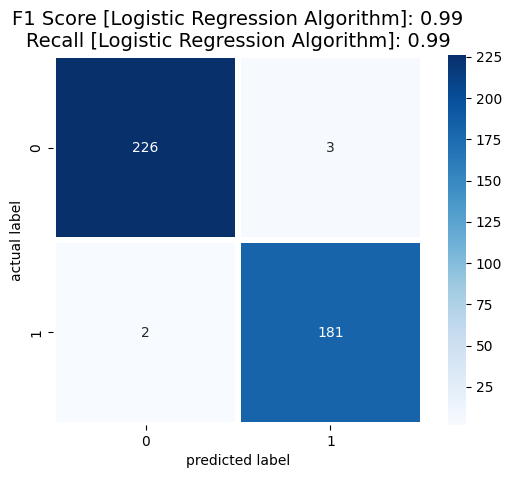

In [27]:
# F1 Score
f1_score_log = metrics.f1_score(y_test, y_predicted, average='micro')

# Confusion martrix
cm_log = metrics.confusion_matrix(y_test, y_predicted)

# recall
recall_log = metrics.recall_score(y_test, y_predicted)

# Heatmap confusion matrix
sns.heatmap(cm_log, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')

# show F1 Score and Recall
plt.title(f'F1 Score [Logistic Regression Algorithm]: {f1_score_log:.2f}\n'
          f'Recall [Logistic Regression Algorithm]: {recall_log:.2f}', size=14, color='black')
plt.show()